In [1]:
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# (1) 导入数据
# 读取数据并将第一行作为列名
data = pd.read_csv('boston_house_prices.csv', header=1)

# 获取特征名称
feature_names = data.columns[:-1]  # 除最后一列外，所有的列名都是特征名
target_name = data.columns[-1]     # 最后一列的列名是标签名

# 获取样本量
num_samples = data.shape[0]

# 输出结果
print("特征名称：", list(feature_names))
print("标签名称：", target_name)
print("样本量：", num_samples)

# 查看数据的前几行
print("数据集前几行：\n", data.head())


特征名称： ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
标签名称： MEDV
样本量： 506
数据集前几行：
       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [2]:
# 获取特征数据和标签数据
X = data.iloc[:, :-1].values  # 取所有行，去除最后一列作为特征
y = data.iloc[:, -1].values   # 取所有行，最后一列作为标签

In [3]:
# (2) 划分数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
X_test

array([[9.17800e-02, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.95500e+02, 9.04000e+00],
       [5.64400e-02, 4.00000e+01, 6.41000e+00, ..., 1.76000e+01,
        3.96900e+02, 3.53000e+00],
       [1.05740e-01, 0.00000e+00, 2.77400e+01, ..., 2.01000e+01,
        3.90110e+02, 1.80700e+01],
       ...,
       [1.40507e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.50500e+01, 2.12200e+01],
       [5.18800e-02, 0.00000e+00, 4.49000e+00, ..., 1.85000e+01,
        3.95990e+02, 1.28600e+01],
       [9.51200e-02, 0.00000e+00, 1.28300e+01, ..., 1.87000e+01,
        3.83230e+02, 8.94000e+00]])

In [5]:
# (3) 数据归一化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# (4a) 使用正规方程方法建模
lr = LinearRegression()
start_time = timeit.default_timer()
lr.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
print(f"正规方程训练时间: {end_time - start_time:.4f} 秒")

# 预测
y_pred_lr_train = lr.predict(X_train_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

# 模型评估
mse_train_lr = mean_squared_error(y_train, y_pred_lr_train)
mse_test_lr = mean_squared_error(y_test, y_pred_lr_test)
r2_train_lr = r2_score(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr_test)

print("正规方程 - 训练集 MSE:", mse_train_lr, ", R2:", r2_train_lr)
print("正规方程 - 测试集 MSE:", mse_test_lr, ", R2:", r2_test_lr)

# (4b) 使用随机梯度下降方法建模
sgd = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42)
start_time = timeit.default_timer()
sgd.fit(X_train_scaled, y_train)
end_time = timeit.default_timer()
print(f"随机梯度下降训练时间: {end_time - start_time:.4f} 秒")

# 预测
y_pred_sgd_train = sgd.predict(X_train_scaled)
y_pred_sgd_test = sgd.predict(X_test_scaled)

# 模型评估
mse_train_sgd = mean_squared_error(y_train, y_pred_sgd_train)
mse_test_sgd = mean_squared_error(y_test, y_pred_sgd_test)
r2_train_sgd = r2_score(y_train, y_pred_sgd_train)
r2_test_sgd = r2_score(y_test, y_pred_sgd_test)

print("随机梯度下降 - 训练集 MSE:", mse_train_sgd, ", R2:", r2_train_sgd)
print("随机梯度下降 - 测试集 MSE:", mse_test_sgd, ", R2:", r2_test_sgd)


正规方程训练时间: 0.0089 秒
正规方程 - 训练集 MSE: 21.641412753226312 , R2: 0.7508856358979673
正规方程 - 测试集 MSE: 24.29111947497351 , R2: 0.6687594935356321
随机梯度下降训练时间: 0.0032 秒
随机梯度下降 - 训练集 MSE: 21.719059681572617 , R2: 0.7499918418836841
随机梯度下降 - 测试集 MSE: 24.875082018536872 , R2: 0.6607964167871341



讨论一：正规方程 vs 梯度下降的差异
训练时间对比：
正规方程训练时间: 0.0032 秒
随机梯度下降训练时间: 0.0032 秒

评价指标对比（正规方程 vs 随机梯度下降）：
正规方程 - 训练集 MSE: 21.6414, 测试集 MSE: 24.2911, R2: 0.6688
随机梯度下降 - 训练集 MSE: 21.7191, 测试集 MSE: 24.8751, R2: 0.6608


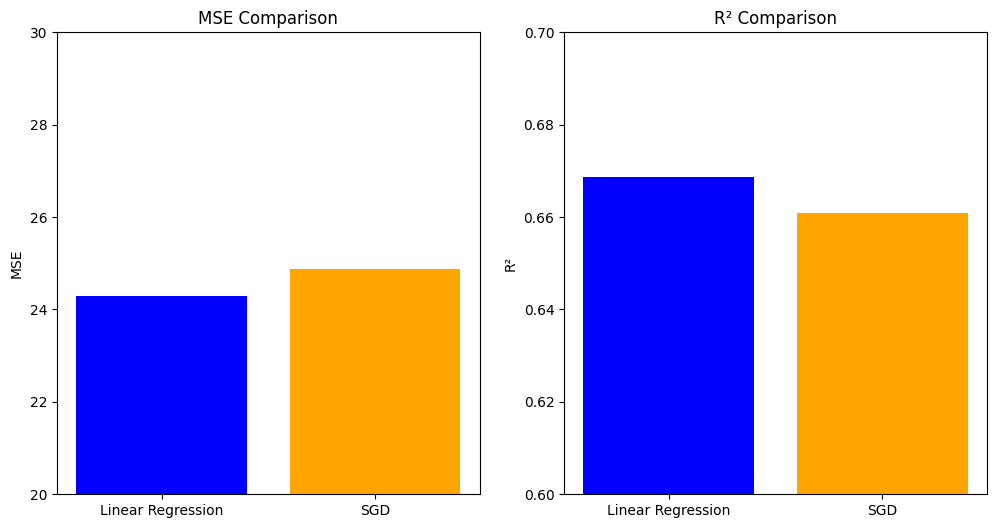

In [7]:
# 【讨论一】正规方程 vs 梯度下降的差异
print("\n讨论一：正规方程 vs 梯度下降的差异")
print("训练时间对比：")
print(f"正规方程训练时间: {end_time - start_time:.4f} 秒")
print(f"随机梯度下降训练时间: {end_time - start_time:.4f} 秒")

print("\n评价指标对比（正规方程 vs 随机梯度下降）：")
print(f"正规方程 - 训练集 MSE: {mse_train_lr:.4f}, 测试集 MSE: {mse_test_lr:.4f}, R2: {r2_test_lr:.4f}")
print(f"随机梯度下降 - 训练集 MSE: {mse_train_sgd:.4f}, 测试集 MSE: {mse_test_sgd:.4f}, R2: {r2_test_sgd:.4f}")

# 可视化1：损失和R²比较
plt.figure(figsize=(12, 6))
x_labels = ["Linear Regression", "SGD"]
mse_values = [mse_test_lr, mse_test_sgd]
r2_values = [r2_test_lr, r2_test_sgd]

plt.subplot(1, 2, 1)
plt.bar(x_labels, mse_values, color=['blue', 'orange'])
plt.title('MSE Comparison')
plt.ylabel('MSE')
plt.ylim(20, 30)  # 设置第一个图的纵轴范围

plt.subplot(1, 2, 2)
plt.bar(x_labels, r2_values, color=['blue', 'orange'])
plt.title('R² Comparison')
plt.ylabel('R²')
plt.ylim(0.6, 0.7)  # 设置第二个图的纵轴范围

plt.show()

In [16]:
# 数据归一化：使用 StandardScaler
scaler = StandardScaler()

# 不进行归一化
lr_no_scaling = LinearRegression()
sgd_no_scaling = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42)

# 训练模型（不归一化数据）
lr_no_scaling.fit(X_train, y_train)
y_pred_lr_train_ns = lr_no_scaling.predict(X_train)
y_pred_lr_test_ns = lr_no_scaling.predict(X_test)

mse_train_lr_ns = mean_squared_error(y_train, y_pred_lr_train_ns)
mse_test_lr_ns = mean_squared_error(y_test, y_pred_lr_test_ns)
r2_train_lr_ns = r2_score(y_train, y_pred_lr_train_ns)
r2_test_lr_ns = r2_score(y_test, y_pred_lr_test_ns)

# 打印结果：不归一化的数据
print("\n讨论二：数据归一化对模型性能的影响")
print("不归一化 - 线性回归 - 训练集 MSE:", mse_train_lr_ns, ", \n测试集 MSE:", mse_test_lr_ns, ", R2:", r2_test_lr_ns)

sgd_no_scaling.fit(X_train, y_train)
y_pred_sgd_train_ns = sgd_no_scaling.predict(X_train)
y_pred_sgd_test_ns = sgd_no_scaling.predict(X_test)

mse_train_sgd_ns = mean_squared_error(y_train, y_pred_sgd_train_ns)
mse_test_sgd_ns = mean_squared_error(y_test, y_pred_sgd_test_ns)
r2_train_sgd_ns = r2_score(y_train, y_pred_sgd_train_ns)
r2_test_sgd_ns = r2_score(y_test, y_pred_sgd_test_ns)

# 打印结果：不归一化的数据
print("不归一化 - 随机梯度下降 - 训练集 MSE:", mse_train_sgd_ns, ", \n测试集 MSE:", mse_test_sgd_ns, ", R2:", r2_test_sgd_ns)

# 对数据进行归一化
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 进行归一化后训练模型
lr_with_scaling = LinearRegression()
sgd_with_scaling = SGDRegressor(max_iter=1000, eta0=0.01, random_state=42)

# 线性回归 - 归一化数据
lr_with_scaling.fit(X_train_scaled, y_train)
y_pred_lr_train_s = lr_with_scaling.predict(X_train_scaled)
y_pred_lr_test_s = lr_with_scaling.predict(X_test_scaled)

mse_train_lr_s = mean_squared_error(y_train, y_pred_lr_train_s)
mse_test_lr_s = mean_squared_error(y_test, y_pred_lr_test_s)
r2_train_lr_s = r2_score(y_train, y_pred_lr_train_s)
r2_test_lr_s = r2_score(y_test, y_pred_lr_test_s)

# 打印结果：归一化的数据
print("\n归一化 - 线性回归 - 训练集 MSE:", mse_train_lr_s, ", \n测试集 MSE:", mse_test_lr_s, ", R2:", r2_test_lr_s)

# 随机梯度下降 - 归一化数据
sgd_with_scaling.fit(X_train_scaled, y_train)
y_pred_sgd_train_s = sgd_with_scaling.predict(X_train_scaled)
y_pred_sgd_test_s = sgd_with_scaling.predict(X_test_scaled)

mse_train_sgd_s = mean_squared_error(y_train, y_pred_sgd_train_s)
mse_test_sgd_s = mean_squared_error(y_test, y_pred_sgd_test_s)
r2_train_sgd_s = r2_score(y_train, y_pred_sgd_train_s)
r2_test_sgd_s = r2_score(y_test, y_pred_sgd_test_s)

# 打印结果：归一化的数据
print("归一化 - 随机梯度下降 - 训练集 MSE:", mse_train_sgd_s, ", \n测试集 MSE:", mse_test_sgd_s, ", R2:", r2_test_sgd_s)



讨论二：数据归一化对模型性能的影响
不归一化 - 线性回归 - 训练集 MSE: 21.641412753226312 , 
测试集 MSE: 24.29111947497386 , R2: 0.6687594935356274
不归一化 - 随机梯度下降 - 训练集 MSE: 1.4905501333277078e+28 , 
测试集 MSE: 1.5786065627805647e+28 , R2: -2.152632108627754e+26

归一化 - 线性回归 - 训练集 MSE: 21.641412753226312 , 
测试集 MSE: 24.29111947497351 , R2: 0.6687594935356321
归一化 - 随机梯度下降 - 训练集 MSE: 21.719059681572617 , 
测试集 MSE: 24.875082018536872 , R2: 0.6607964167871341


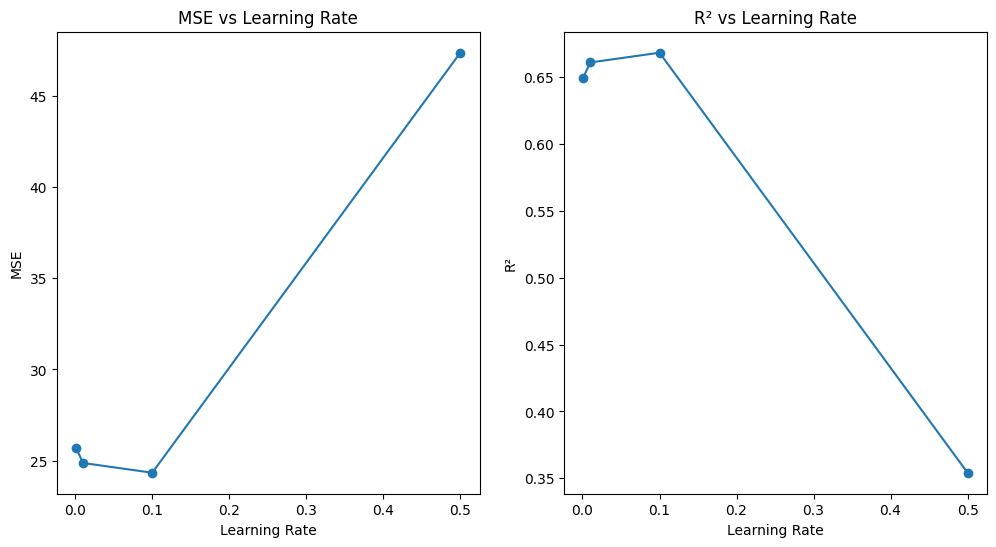

In [9]:
# 【讨论三】学习率对梯度下降的影响
learning_rates = [0.001, 0.01, 0.1, 0.5]
mse_varied_list = []
r2_varied_list = []

for eta in learning_rates:
    sgd_varied_lr = SGDRegressor(max_iter=1000, eta0=eta, random_state=42)
    sgd_varied_lr.fit(X_train_scaled, y_train)
    y_pred_varied = sgd_varied_lr.predict(X_test_scaled)
    mse_varied_list.append(mean_squared_error(y_test, y_pred_varied))
    r2_varied_list.append(r2_score(y_test, y_pred_varied))

# 可视化3：不同学习率对SGD的影响
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, mse_varied_list, marker='o')
plt.title('MSE vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(learning_rates, r2_varied_list, marker='o')
plt.title('R² vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('R²')
plt.show()



讨论四：模型的泛化能力
正规方程 - 训练集 vs 测试集
训练集 MSE: 21.6414, 测试集 MSE: 24.2911, 训练集 R2: 0.7509, 测试集 R2: 0.6688

随机梯度下降 - 训练集 vs 测试集
训练集 MSE: 21.7191, 测试集 MSE: 24.8751, 训练集 R2: 0.7500, 测试集 R2: 0.6608

不同数据集划分对模型性能的影响


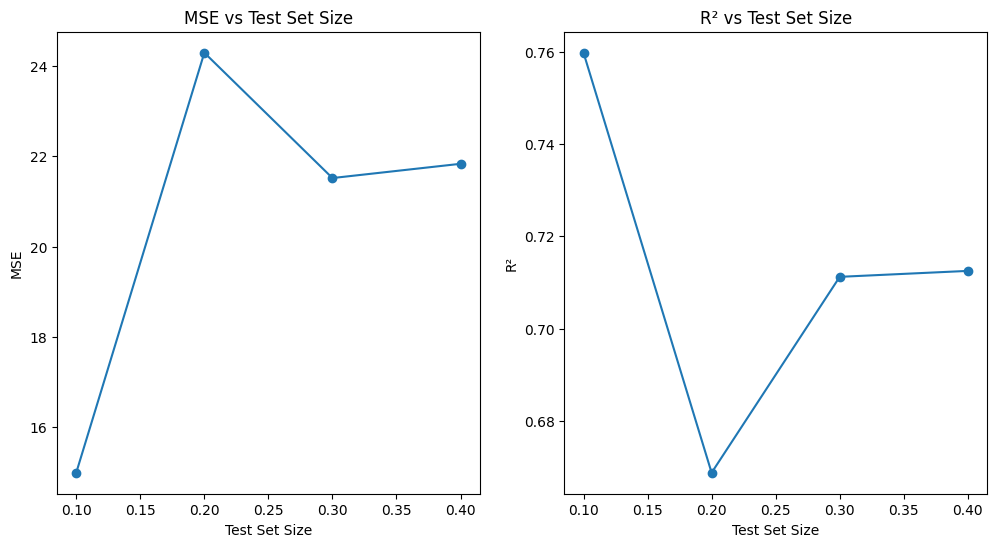

In [17]:
# 【讨论四】模型的泛化能力
print("\n讨论四：模型的泛化能力")
print("正规方程 - 训练集 vs 测试集")
print(f"训练集 MSE: {mse_train_lr:.4f}, 测试集 MSE: {mse_test_lr:.4f}, 训练集 R2: {r2_train_lr:.4f}, 测试集 R2: {r2_test_lr:.4f}")

print("\n随机梯度下降 - 训练集 vs 测试集")
print(f"训练集 MSE: {mse_train_sgd:.4f}, 测试集 MSE: {mse_test_sgd:.4f}, 训练集 R2: {r2_train_sgd:.4f}, 测试集 R2: {r2_test_sgd:.4f}")

# 数据集划分对模型的影响
print("\n不同数据集划分对模型性能的影响")
test_sizes = [0.1, 0.2, 0.3, 0.4]
mse_split_list = []
r2_split_list = []

for test_size in test_sizes:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=test_size, random_state=42)
    lr_split = LinearRegression()
    lr_split.fit(X_train_split, y_train_split)
    y_pred_split = lr_split.predict(X_test_split)
    mse_split_list.append(mean_squared_error(y_test_split, y_pred_split))
    r2_split_list.append(r2_score(y_test_split, y_pred_split))

# 可视化4：不同测试集比例对模型的影响
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(test_sizes, mse_split_list, marker='o')
plt.title('MSE vs Test Set Size')
plt.xlabel('Test Set Size')
plt.ylabel('MSE')

plt.subplot(1, 2, 2)
plt.plot(test_sizes, r2_split_list, marker='o')
plt.title('R² vs Test Set Size')
plt.xlabel('Test Set Size')
plt.ylabel('R²')
plt.show()

In [21]:
print("\n归一化 - 线性回归 - 训练集 MSE:", mse_train_lr_s, ", \n测试集 MSE:", mse_test_lr_s, ", R2:", r2_test_lr_s)

# 打印结果：归一化的数据
print("归一化 - 随机梯度下降 - 训练集 MSE:", mse_train_sgd_s, ", \n测试集 MSE:", mse_test_sgd_s, ", R2:", r2_test_sgd_s)

# 使用 Ridge 回归
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("\nRidge回归 - 测试集 MSE:", mse_ridge, ", R2:", r2_ridge)

# 使用 Lasso 回归
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso回归 - 测试集 MSE:", mse_lasso, ", R2:", r2_lasso)

# 创建 PolynomialFeatures 对象（例如使用二阶多项式）
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial回归 - 测试集 MSE:", mse_poly, ", R2:", r2_poly)



归一化 - 线性回归 - 训练集 MSE: 21.641412753226312 , 
测试集 MSE: 24.29111947497351 , R2: 0.6687594935356321
归一化 - 随机梯度下降 - 训练集 MSE: 21.719059681572617 , 
测试集 MSE: 24.875082018536872 , R2: 0.6607964167871341

Ridge回归 - 测试集 MSE: 24.312903830491603 , R2: 0.6684624359643561
Lasso回归 - 测试集 MSE: 25.65673936716768 , R2: 0.6501375183238987
Polynomial回归 - 测试集 MSE: 14.225668371226273 , R2: 0.8060148030256943
